In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd



In [27]:
df= pd.read_csv("cloth-data.csv")


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
 6   shoes     1000 non-null   int64 
 7   Sweater   1000 non-null   int64 
 8   Jeans     1000 non-null   int64 
 9   Jacket    1000 non-null   int64 
 10  Dress     1000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 86.1+ KB


In [29]:
	# How many unique brands are represented in the dataset?
df['Brand'].unique()

array(['New Balance', 'Under Armour', 'Nike', 'Adidas', 'Reebok', 'Puma'],
      dtype=object)

In [30]:
	# Which three categories have the highest average price?
df.groupby('Category')['Price'].mean().nlargest()

Category
Dress      114.506024
Shoes      108.569767
Sweater    106.781250
T-shirt    104.562500
Jacket     102.827225
Name: Price, dtype: float64

C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\4088579324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Category'],palette="rainbow")


<Axes: xlabel='Category', ylabel='count'>

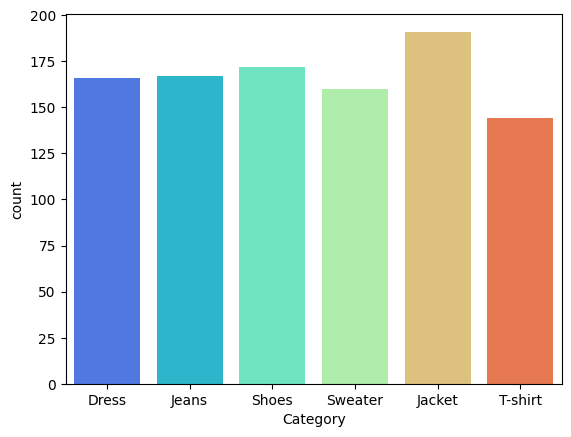

In [31]:
# category wise filtering what categori product most sale 

sns.countplot(x = df['Category'],palette="rainbow")




In [32]:
# What proportion of items are made from each material?

df['Material'].value_counts(normalize=True)

Material
Polyester    0.175
Silk         0.173
Wool         0.172
Denim        0.163
Cotton       0.162
Nylon        0.155
Name: proportion, dtype: float64

C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\1880818704.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y= df['Material'],palette="rainbow")


<Axes: xlabel='count', ylabel='Material'>

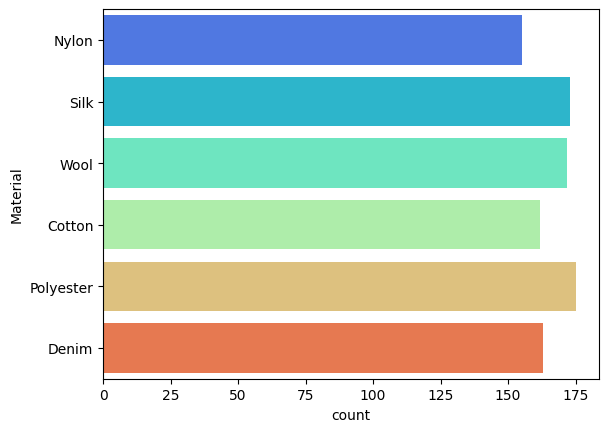

In [33]:
sns.countplot(y= df['Material'],palette="rainbow")


In [34]:
	# What is the overall median price, and how does it compare to the mean?

df['Price'].mean()
# sns.countplot(y= df['Price'.mean()],palette="mako")


np.float64(106.289)

In [35]:
# Which brand offers items in the largest number of distinct categories?
df.groupby('Brand')['Category'].nunique().idxmax()

'Adidas'

C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\2650256194.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df['Category'],palette="mako")


<Axes: xlabel='Category', ylabel='count'>

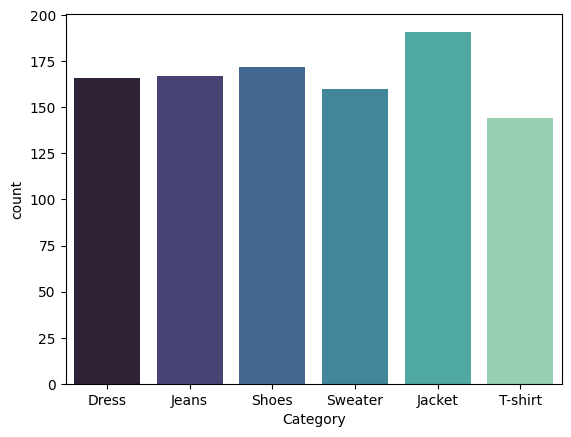

In [36]:
df.groupby('Category')['Color'].agg(lambda x: x.mode()[0])
sns.countplot(x= df['Category'],palette="mako")

In [37]:
df.describe().sum()

Price    1686.734444
dtype: float64

In [38]:
df['Color']=df['Color'].str.strip().str.lower()
df


,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,white,XS,Nylon,182
1,New Balance,Jeans,black,XS,Silk,57
2,Under Armour,Dress,red,M,Wool,127
3,Nike,Shoes,green,M,Cotton,77
4,Adidas,Sweater,white,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,black,L,Polyester,176
996,Puma,Jacket,red,XXL,Silk,110
997,Reebok,Sweater,blue,XS,Denim,127
998,Under Armour,Sweater,black,XXL,Denim,69


In [39]:
# add new column for easy understanding 
categories= ['shoes', 'Sweater','Jeans', 'Jacket','Dress']

for cat in categories:
  df[cat] = df['Category'].apply(lambda x: 1 if x ==cat else 0)


In [40]:
df.head(1)

,Brand,Category,Color,Size,Material,Price,shoes,Sweater,Jeans,Jacket,Dress
0,New Balance,Dress,white,XS,Nylon,182,0,0,0,0,1


b


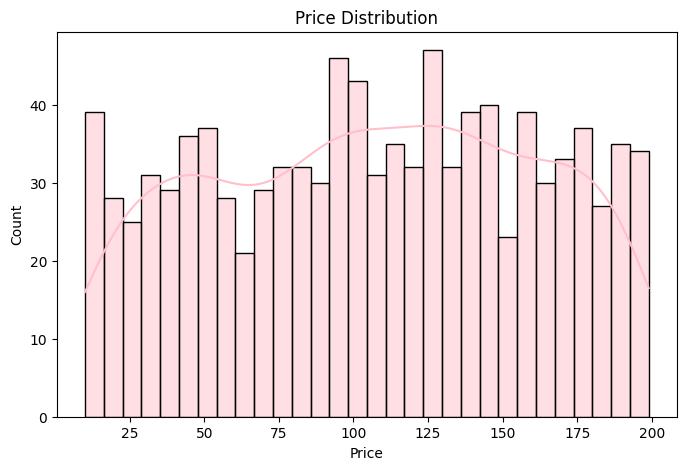

In [41]:
# price wise distribution and range of high and low 
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='pink')
plt.title('Price Distribution')
plt.xlabel('Price')

plt.show()

Most common material: Polyester


C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\775459631.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Color', palette='Set2', order=df['Color'].value_counts().index)


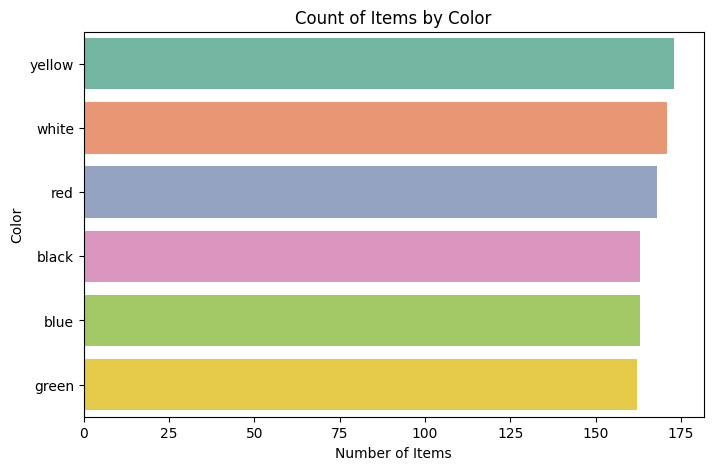

In [42]:
# find most value to occur in column 
#value return by most repreat color 
most_common_material = df['Material'].value_counts().idxmax()
print("Most common material:", most_common_material)
df[df["Color"]=='yellow'].value_counts()
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Color', palette='Set2', order=df['Color'].value_counts().index)

plt.title("Count of Items by Color")
plt.xlabel("Number of Items")
plt.ylabel("Color")


plt.show()


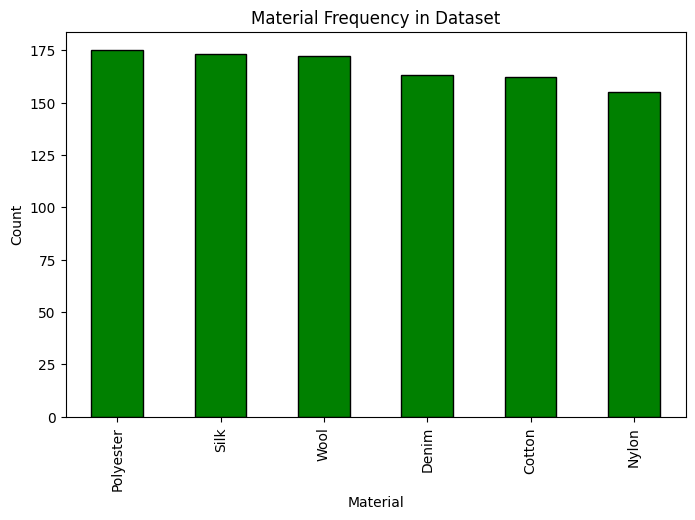

In [43]:
# material vise data filtering most material used in.
material_counts = df['Material'].value_counts()
plt.figure(figsize=(8, 5))
material_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Material Frequency in Dataset')
plt.xlabel('Material')
plt.ylabel('Count')


plt.show()

C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\2331910256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Size', palette='rainbow')


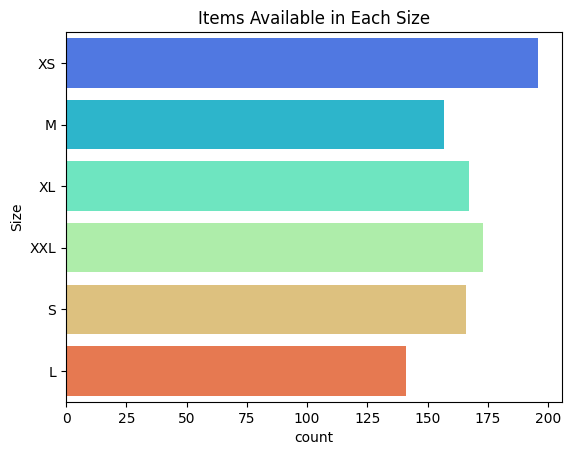

In [44]:
# size by data filter most what size most sale in dataset 
sns.countplot(data=df, y='Size', palette='rainbow')

plt.title("Items Available in Each Size")



plt.show()

In [45]:
most_common_material = df['Color'].value_counts().idxmax()
print("Most common material:", most_common_material)
df[df["Color"]=='yellow'].value_counts()

Most common material: yellow


Brand         Category  Color   Size  Material   Price  shoes  Sweater  Jeans  Jacket  Dress
Adidas        Dress     yellow  XL    Denim      116    0      0        0      0       1        1
                                      Nylon      94     0      0        0      0       1        1
                                      Silk       21     0      0        0      0       1        1
                                XS    Denim      98     0      0        0      0       1        1
                                XXL   Silk       112    0      0        0      0       1        1
                                                                                               ..
Under Armour  Sweater   yellow  XXL   Silk       55     0      1        0      0       0        1
              T-shirt   yellow  S     Silk       19     0      0        0      0       0        1
                                XS    Denim      195    0      0        0      0       0        1
                         

In [46]:
# Which category has the highest average price?
categories_avg = df.groupby('Category')['Price'].mean().idxmax()
categories_avg

'Dress'

C:\Users\vloga\AppData\Local\Temp\ipykernel_1872\2640789500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Brand', palette='viridis', order=df['Brand'].value_counts().index)


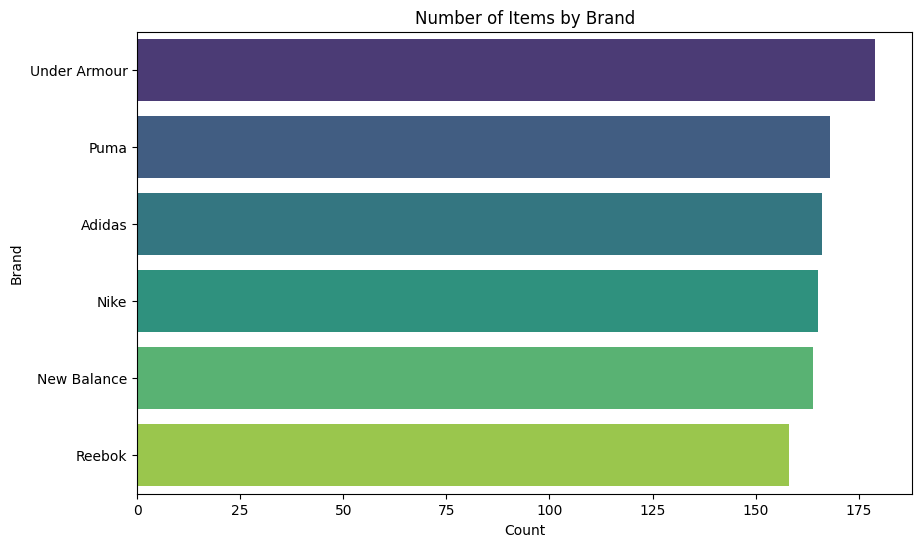

In [47]:
#  Plot a countplot of items by brand.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Brand', palette='viridis', order=df['Brand'].value_counts().index)

plt.title('Number of Items by Brand')
plt.xlabel('Count')

plt.show()
